In [1]:
import sys
sys.path.insert(1, '../..')

In [2]:
from medicine import db
from medicine.models.medicine import Medicine
from medicine.models.alias import Alias
from collections import Counter

In [3]:
content = ''

with open('./data/本草纲目(簡體).txt', 'r', encoding='utf8') as file:
    for line in file:
        content += line
content[0:20]

'<篇名>本草纲目\n书名：本草纲目\n作者：'

In [4]:
m = Medicine.query.all()
print(m[3].alias)

[Alias('膏露'), Alias('瑞露'), Alias('天酒'), Alias('神浆')]


F:\Python\anaconda3\lib\site-packages\sqlalchemy\engine\default.py:470: Warning: (1366, "Incorrect string value: '\\xA5x\\xA5_\\xBC\\xD0...' for column 'VARIABLE_VALUE' at row 480")
  cursor.execute(statement, parameters)


In [5]:
joindata = db.session.query(Medicine.name, Alias.name).outerjoin(Alias).all()
joindata[0:5]

[('KT蒿', '莪蒿'),
 ('KT蒿', '萝蒿'),
 ('KT蒿', '抱娘蒿'),
 ('《名医别录》', None),
 ('《本草拾遗》', None)]

In [6]:
keys = set([item[0] for item in joindata])
data_dict = dict()

for k in keys:
    v = [item[1] for item in joindata if item[0] == k]
    v = v if v[0] is not None else []
    data_dict[k] = v

dict(list(data_dict.items())[0:3])

{'山鹊': ['学二音'], '灵寿木': ['扶老杖', '椐'], '风延母': []}

In [7]:
medicines = []

for k, v in data_dict.items():
    v = v.copy()
    v.append(k)
    medicines.extend(v)
medicines[0:5]

['学二音', '山鹊', '风延母', '扶老杖', '椐']

In [8]:
import numpy as np
import pandas as pd

df = pd.DataFrame(medicines, columns=["item"])
# df.to_csv('./jieba_data/userdict.txt', header=None, index=None, sep=' ', mode='a')

In [9]:
import re
import jieba

jieba.set_dictionary('./jieba_data/zhtw_dict.txt.big')
jieba.load_userdict('./jieba_data/userdict.txt')

Building prefix dict from D:\TMU_BigData\0.專題\程式\project(medicine)\medicine\medicine\test\jieba_data\zhtw_dict.txt.big ...
Loading model from cache C:\Users\leoch\AppData\Local\Temp\jieba.u2db2bc402b2b8b88dc78a63f7f8602df.cache
Loading model cost 0.546 seconds.
Prefix dict has been built succesfully.


In [10]:
signs = ''
with open('./jieba_data/punctuation.txt', encoding='utf-8') as f:
    signs = f.readlines()
    signs = [sign.strip() for sign in signs] 

signs_str = '|'.join(signs)
signs_str = re.sub('(\[|\])', r'\\\1', signs_str)
signs_str

'\\[|.|!|/|-|>|<|$|%|^|*|(|"|?|\\]|||\\[|—|！|，|。|？|、|（|）|：|」|「|)|(|【|】|╱|；|\\]|=|「|」|‧|（|）|.|~'

In [11]:
lines = re.split(',|，|。|;|【|】|\n|\u3000', content)
lines = [re.sub('['+signs_str+']', ' ', line).strip() for line in lines]
lines = [line for line in lines if line.strip() != '']

In [12]:
len(lines)
# lines

282280

In [13]:
cut_result = []
for line in lines:
    cut_list = jieba.cut(line, cut_all=False)
    cut_result.extend(cut_list)
len(cut_result)

964752

In [14]:
cut_result = []
cut_list = jieba.cut(content, cut_all=False)
cut_result.extend(cut_list)


In [15]:
# cut_result

In [16]:
from collections import Counter

count_dict = Counter(cut_result)

In [17]:
medicine_count = dict()

for k, v in data_dict.items():
    v = v.copy()
    v.append(k)
    medicine_count[k] = [{k:count_dict[k]} for k in v]
    
# medicine_count

In [18]:
wc_content_list = []
wc_content = ''

for k, v in data_dict.items():
    v = v.copy()
    v.append(k)
    num_list = [count_dict[k] for k in v]
    num = sum(num_list)
    wc_content_list.extend([k] * num)
        
    
wc_content = ' '.join(wc_content_list)
# wc_content

In [23]:
from PIL import Image
from path import Path as path
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [40]:
img_mask = np.array(Image.open('./data/李時珍.jpg'))
font = r'C:/Windows/Fonts/msjh.ttc'

wc = WordCloud(background_color=None,
               mode='RGBA',
               mask=img_mask,
               collocations=False,
               font_path=font,
               width=400,
               height=200,
               margin=2)

wc.generate(wc_content)


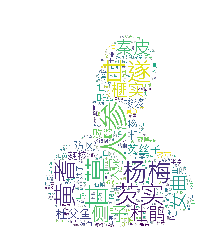

In [41]:
plt.imshow(wc)
plt.axis("off")
plt.show()

In [42]:
wc.to_file('./wordcloud.png')

In [37]:
medicine_count

{'山鹊': [{'学二音': 2}, {'山鹊': 5}],
 '风延母': [{'风延母': 2}],
 '灵寿木': [{'扶老杖': 1}, {'椐': 2}, {'灵寿木': 2}],
 '苏方木': [{'苏木': 29}, {'苏方木': 12}],
 '珠鳖': [{'珠鳖': 4}],
 '石硫青': [{'冬结石': 3}, {'石硫青': 2}],
 '卫矛': [{'鬼箭': 17}, {'神箭': 2}, {'卫矛': 5}],
 '慈菇': [{'借姑': 5}, {'水萍': 25}, {'河凫茈': 2}, {'白地栗': 2}, {'慈菇': 29}],
 '担罗': [{'担罗': 1}],
 '梁上尘': [{'倒挂尘名乌龙尾': 1}, {'烟珠': 1}, {'梁上尘': 27}],
 '柿': [{'漆柿': 3},
  {'绿柿': 2},
  {'青': 289},
  {'乌': 230},
  {'花': 549},
  {'赤棠': 3},
  {'柿': 48}],
 '秧鸡': [{'秧鸡': 3}],
 '山茱萸': [{'蜀酸枣': 2}, {'肉枣': 2}, {'山茱萸': 48}],
 '蜈蚣': [{'蒺藜': 80}, {'蜈蚣': 148}],
 '方解石': [{'黄石': 16}, {'方解石': 27}],
 '鲈鱼': [{'四鳃鱼': 2}, {'鲈鱼': 5}],
 '赤箭': [{'赤箭': 36}],
 '食盐': [{'鹾': 2}, {'食盐': 80}],
 '姜石': [{'KT石': 0}, {'姜石': 16}],
 '酸浆': [{'醋浆': 6},
  {'苦': 870},
  {'苦耽': 17},
  {'灯笼草': 23},
  {'天泡草': 3},
  {'王母珠': 2},
  {'洛神珠': 3},
  {'酸浆': 61}],
 '白棘': [{'棘刺': 26}, {'棘针': 20}, {'菥': 28}, {'马朐': 1}, {'白棘': 22}],
 '羊踯躅': [{'黄踯躅': 2}, {'黄杜鹃': 1}, {'羊不食草': 3}, {'闹羊花': 2}, {'羊踯躅': 17}],
 '银朱': [{'猩红': 2}, {'紫

In [53]:
totle = len(wc_content_list)
temp = Counter(wc_content_list)
temp.most_common(5)


[('人参', 2048), ('甘草', 1458), ('杨梅', 1314), ('芡实', 1312), ('甘遂', 1311)]

In [57]:
1311/totle

0.010726403139435065